### Using Pyspark to handle the data

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.appName('Marine Weather').getOrCreate()

In [3]:
spark

In [4]:
py_spark=spark.read.csv('testset.csv',header=True,inferSchema=True)

In [5]:
py_spark.select(['datetime_utc',' _dewptm',
 ' _fog',
 ' _hail',' _hum', ' _pressurem',
 ' _rain',
 ' _snow',
 ' _tempm',
 ' _thunder',
 ' _tornado', ' _wdird', ' _wspdm']).show()

+--------------+--------+-----+------+-----+-----------+------+------+-------+---------+---------+-------+-------+
|  datetime_utc| _dewptm| _fog| _hail| _hum| _pressurem| _rain| _snow| _tempm| _thunder| _tornado| _wdird| _wspdm|
+--------------+--------+-----+------+-----+-----------+------+------+-------+---------+---------+-------+-------+
|19961101-11:00|       9|    0|     0|   27|     1010.0|     0|     0|     30|        0|        0|    280|    7.4|
|19961101-12:00|      10|    0|     0|   32|    -9999.0|     0|     0|     28|        0|        0|      0|   null|
|19961101-13:00|      11|    0|     0|   44|    -9999.0|     0|     0|     24|        0|        0|      0|   null|
|19961101-14:00|      10|    0|     0|   41|     1010.0|     0|     0|     24|        0|        0|      0|   null|
|19961101-16:00|      11|    0|     0|   47|     1011.0|     0|     0|     23|        0|        0|      0|    0.0|
|19961101-17:00|      12|    0|     0|   56|     1011.0|     0|     0|     21|  

In [6]:
py_spark=py_spark[["datetime_utc"," _dewptm"]]
py_spark.show()

+--------------+--------+
|  datetime_utc| _dewptm|
+--------------+--------+
|19961101-11:00|       9|
|19961101-12:00|      10|
|19961101-13:00|      11|
|19961101-14:00|      10|
|19961101-16:00|      11|
|19961101-17:00|      12|
|19961101-18:00|      13|
|19961101-19:00|      13|
|19961101-20:00|      13|
|19961101-21:00|      13|
|19961101-22:00|      13|
|19961101-23:00|      12|
|19961102-00:00|      11|
|19961102-01:00|      11|
|19961102-02:00|      10|
|19961102-03:00|      10|
|19961102-04:00|      10|
|19961102-05:00|      11|
|19961102-06:00|      10|
|19961102-07:00|      10|
+--------------+--------+
only showing top 20 rows



**Necessary Libraries For Development**

In [1]:
import numpy as np 
import pandas as pd 
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
import os

**Read the data**

In [2]:
data=pd.read_csv("testset.csv")
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

# Exploratory Data Analysis

In [4]:
data.shape

(100990, 20)

**I have extracted datetime and temperature from the data**

In [5]:
data=data[["datetime_utc"," _dewptm"]]
data.head()

,datetime_utc,_dewptm
0,19961101-11:00,9.0
1,19961101-12:00,10.0
2,19961101-13:00,11.0
3,19961101-14:00,10.0
4,19961101-16:00,11.0


In [6]:
data.columns=["date","dewpt"]
data.columns

Index(['date', 'dewpt'], dtype='object')

In [7]:
data.dtypes

date      object
dewpt    float64
dtype: object

**Converting date columns into pandas datetime format**

In [8]:
data["date"]=pd.to_datetime(data["date"],format="%Y%m%d-%H:%M")
data.dtypes

date     datetime64[ns]
dewpt           float64
dtype: object

**Making date column as an index of the dataframe**

In [9]:
data=data.set_index("date")

In [10]:
data.tail()

,dewpt
date,
2017-04-24 06:00:00,17.0
2017-04-24 09:00:00,14.0
2017-04-24 12:00:00,12.0
2017-04-24 15:00:00,15.0
2017-04-24 18:00:00,15.0


**Visualize the data**

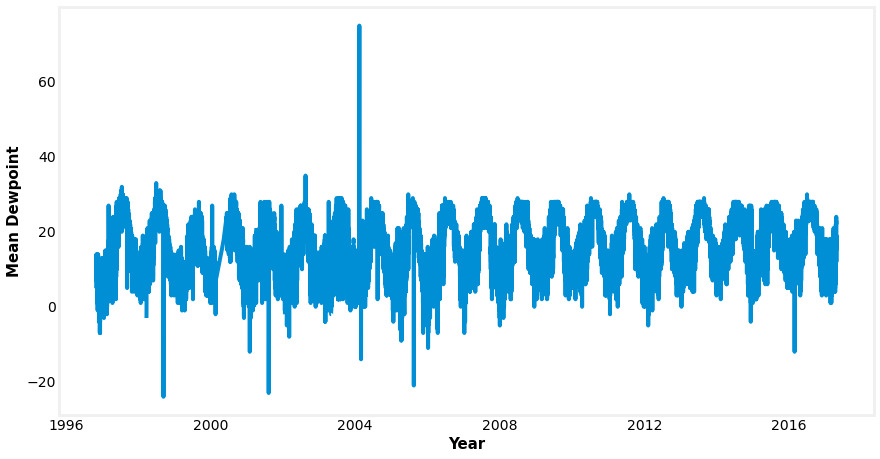

In [11]:
fig=plt.figure(figsize=(13,7),facecolor="white")
ax = plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize="15",fontweight="bold")
plt.grid(False)
plt.plot(data)
plt.show()


**Counting null values: There are 2358 null values in our data but as of now we will not handle the missing data, I have handled in later part of Notebook**

In [12]:
null=data[data.isnull().any(axis=1)]
print("Null values:",null.shape[0])

Null values: 621


**Obtain the average temperature of days in a month(daily_mean),monthly mean(monthly_mean) in a year and hourly mean in a day.**

In [13]:
daily_mean=data.groupby(data.index.day).mean()
monthly_mean=data.groupby(data.index.month).mean()
hourly_mean=data.groupby(data.index.hour).mean()
yearly_mean=data.groupby(data.index.year).mean()


**The plot below makes sense to us, the temperature rises during daytime and drops towards evening and morning.**

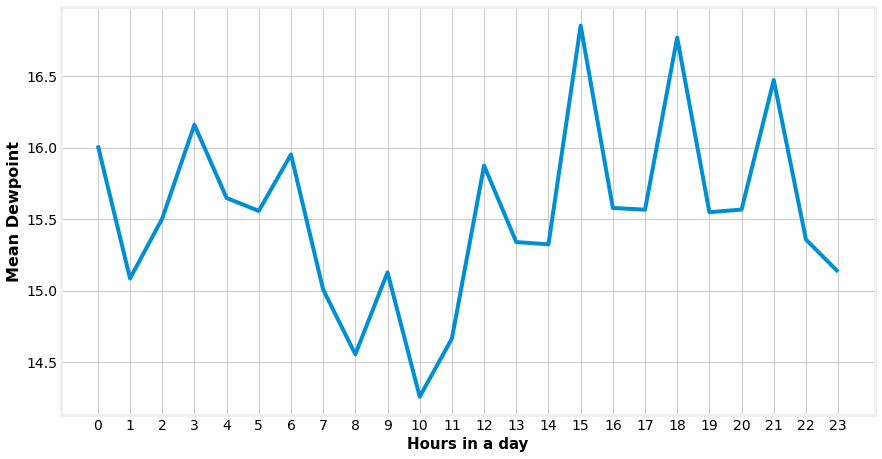

In [14]:
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=16,fontweight="bold")
plt.show()


**The monthly_mean plot depicts that the avg temperature is highest during the summer season(March-July) and drops significantly in winter seasons.**

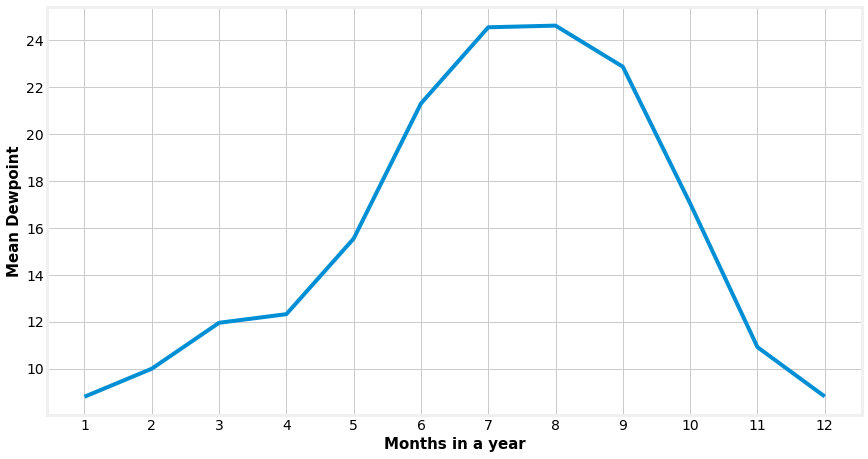

In [15]:
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(1,13))
plt.xlabel("Months in a year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.show()

**There is no noticeable patterns in the days in month, because temperature varies in different days in different months.**

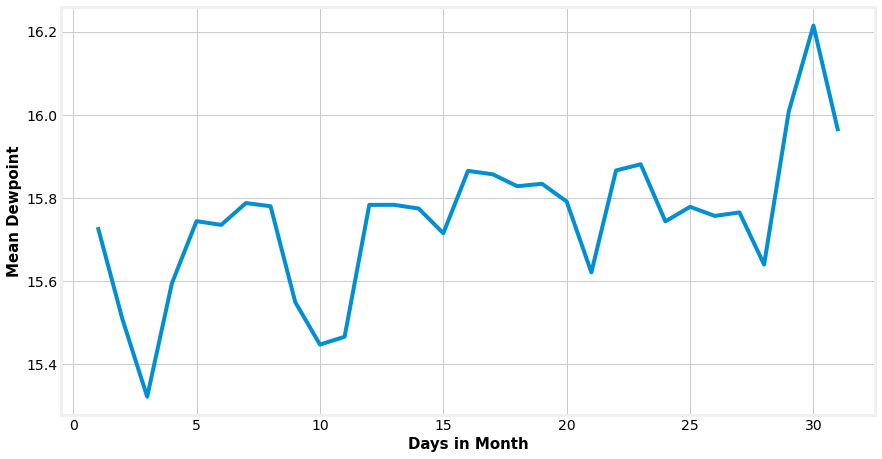

In [16]:
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(daily_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.show()

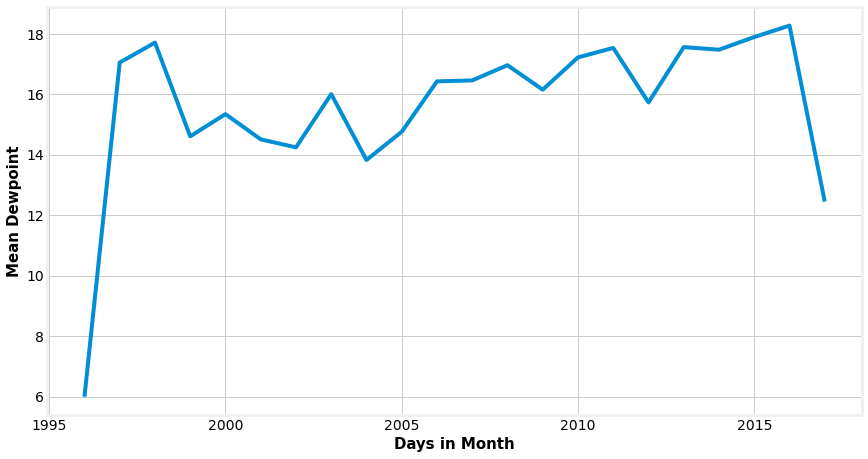

In [17]:
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.show()

# Analysis of Daily Data

**We will now resample our hourly data into daily data using the resampling method**

In [18]:
daily=data.resample("D").mean()
print("Sample reduced by {} rows after resampling".format(data.shape[0]-daily.shape[0]))

Sample reduced by 93510 rows after resampling


**As we plot our daily data we now observe that in between 2000-2001 there are huge amount of missing data, so we will take the dataset from 2001 and drop the data of preceding days.**

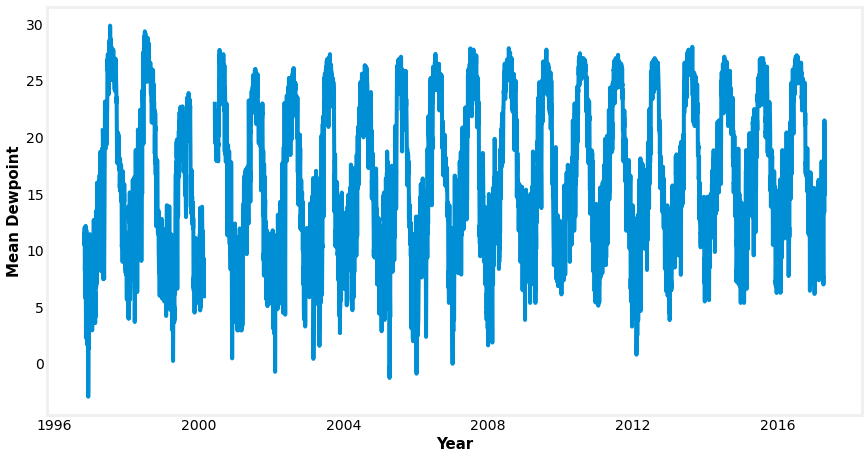

In [19]:
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(False)
plt.plot(daily)
plt.show()

**Droping daily data before 2001-01-01**

In [20]:
daily=daily["2001-01-01":]
daily.shape

(5958, 1)

**Now my data contains observations from 2001-01-01 as seen in the plot below**

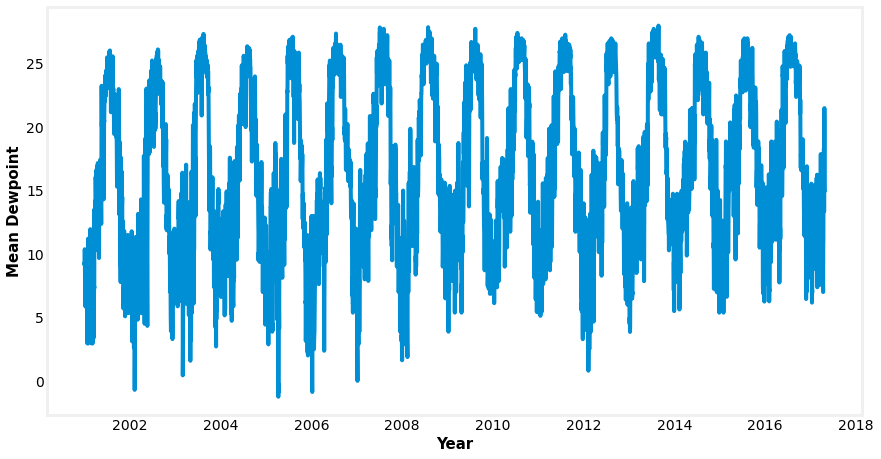

In [21]:
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(False)
plt.plot(daily)
plt.show()


**Despite removing huge chunk of missing data, I re-encountered 4 missing data, since now the amount of missing data is very small compared to the total datasize, I have filled the daily missing data using the temperatures of preceding days.**

In [22]:
print("Null values before:",daily.isnull().sum())

daily=daily.fillna(method="ffill")

print("Null values After:",daily.isnull().sum())

Null values before: dewpt    4
dtype: int64
Null values After: dewpt    0
dtype: int64


# MA(Moving Average to predict daily temperature):

**Since there is minute difference in the temperature between consecutive days, I assumed that present days temperature will be equivalent to the average temperature of its preceding day.**

**So I have used current temperature as the temperature of its past one day and for that reason I have made a predicted temperature by shifting the dataframe by one row.**

In [23]:
actual=daily["dewpt"].to_frame().rename(columns={"dewpt":"actual"})
predicted=daily["dewpt"].to_frame().shift(1).rename(columns={"dewpt":"predicted"})

df_daily=pd.concat([actual,predicted],axis=1)

In [24]:
df_daily.head()

,actual,predicted
date,,
2001-01-01,9.375000,NaN
2001-01-02,9.125000,9.375000
2001-01-03,10.375000,9.125000
2001-01-04,10.208333,10.375000
2001-01-05,8.791667,10.208333


**There is one nan row because of shifting so I have deleted that**

In [25]:
df_daily=df_daily[1:]

**The blue line shows actual data and orange as predicted temperature, we can see that the plot is so identical and the forecasting is so precise**

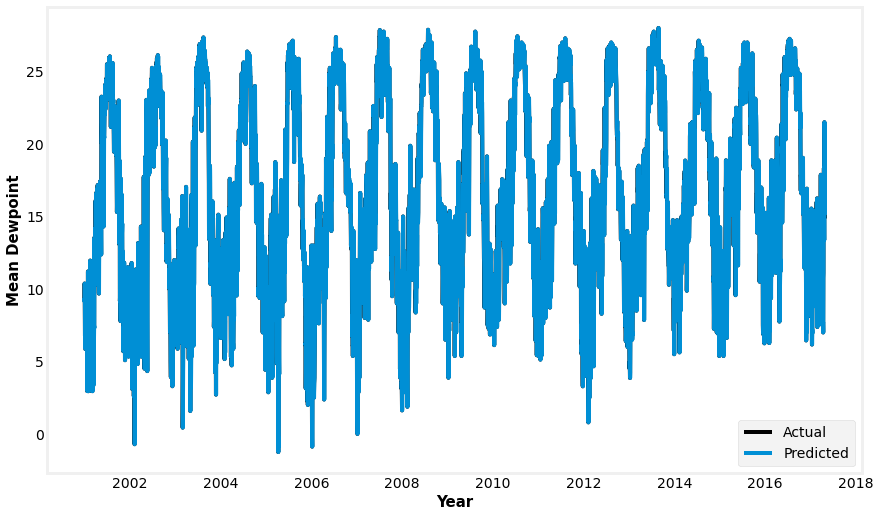

In [26]:
fig=plt.figure(figsize=(13,8),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(df_daily["actual"],label="Actual",color="black")
plt.plot(df_daily["predicted"],label="Predicted")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(False)
plt.legend(loc="best")
plt.show()

**RMSE values accounts to 1.6 which is pretty good.**

In [27]:
rmse=mean_squared_error(df_daily["actual"],df_daily["predicted"],squared=False)
print("RMSE: {:.1f}".format(rmse))

RMSE: 1.7


# Disadvantage of MA:

* **Since I am just taking the temperature of past as the temperature of future, in a long run my model will just be predicting same recorded temperatures, this is so Naive of MA model.**
* **We know that for past decades we are experiencing a rise in temperature(global warming), and it will increase in the future, so for that reason we also have to take into account of exogenous features/variables, which MA neglects.**


# Analysis of Monthly Data

**I have resampled my daily data into monthly data**

**As we can see the plot becomes more smoother than the daily data**

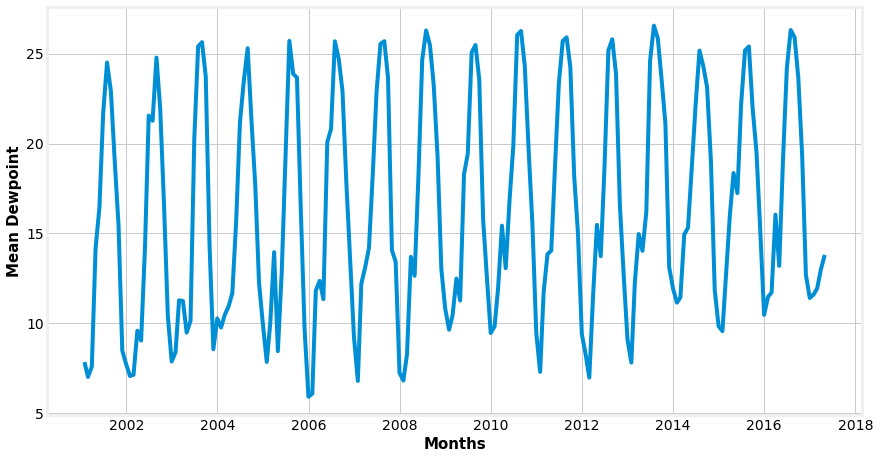

In [28]:
monthly=daily.resample("M").mean()
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(monthly)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(True)
plt.show()

**Components of Time Series Data:**

**1. Trend: A gradual increase or decrease increase in the of observations(mean & variance) over a long period of time.**

**2. Seasonality: Repeating/predictable pattern over a certain time period.**

**3. Residual: It is also called as the white noise, which generally are the errors which does not account to trend and seasonality.**

**I have decomposed monthly data and it shows clear seasonality in every 12 months and from 2002-2008 the monthly temperature decreases, however increases later.**

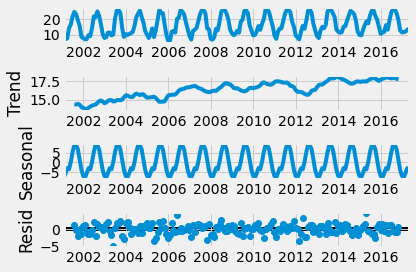

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(monthly)
result.plot()
plt.show()

In [30]:
monthly.head()

,dewpt
date,
2001-01-31,7.839231
2001-02-28,7.010094
2001-03-31,7.584635
2001-04-30,14.158066
2001-05-31,16.454676


# Stationarity test:

**Non-Stationarity data: Since we have observed that our data exhibits seasonality and trend & it will effect value of time series at different time. So to feed our time series data to Models we have to convert them into stationary data**

**Stationairty data: Data whose properties does not depend on time. The mean and variance remain constant with change in time, and hence the data dependence on time will be eliminated can perform statistical analysis on stationary data.**

# Ways to check stationarity:
**1. Visualization: We have concluded form the above visualization plots that the data exhibits seasonality.**

**2. Adfuller test: We can confirm data stationarity using adfuller statistics which I have discussed below**

In [31]:
from statsmodels.tsa.stattools import adfuller

**The function will return the adfuller statistics**


In [32]:
def check_adfuller(data):
    result=adfuller(data)
    
    print("ADF statistics:{}".format(result[0]))
    print("p-value:{}".format(result[1]))
    print("lags used:{}".format(result[2]))
    print("No of observation:{}".format(result[3]))
    print()
    print("Critical Values:")
    for key,value in result[4].items():
        print("Critical({}):{}".format(key,value))    

**Ideally we consider that time series data as stationary if p-value<0.05 & ADF statstics lesser than critical values, however in this case we have p=0.55 and ADF statistics greater than critical values, hence we conclude that our monthly data is not stationary.** 

In [33]:
check_adfuller(monthly)

ADF statistics:-1.669348377961194
p-value:0.4469702578346585
lags used:11
No of observation:184

Critical Values:
Critical(1%):-3.466398230774071
Critical(5%):-2.8773796387256514
Critical(10%):-2.575213838610586


# How to make data stationary?
**Differencing**: It is a method of transforming a time series dataset. It can be used to remove the series dependence on time, so-called temporal dependence. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.


**For this reason I have used differencing with an order of 12(Seasonal order) as we have observed that data has a repeating pattern after 12 months period.**

In [34]:
monthly["Seasonal Diff"]=monthly["dewpt"]-monthly["dewpt"].shift(12)

**Now our p-value is less than 0.05 and ADF statistics smaller than critical values, now we have obtained a stationary data.**

In [35]:
check_adfuller(monthly["Seasonal Diff"].dropna())

ADF statistics:-5.434978398841281
p-value:2.85891729383474e-06
lags used:12
No of observation:171

Critical Values:
Critical(1%):-3.4691814633722453
Critical(5%):-2.878595143532943
Critical(10%):-2.5758625549741803


**Comparing the Differenced series with an original series it have remove trend and sesonality form our data**

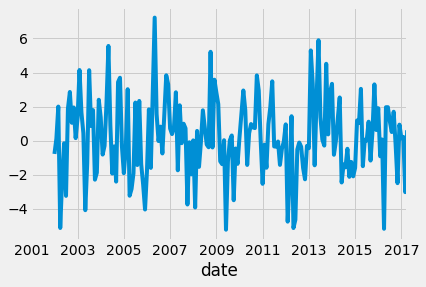

In [36]:
monthly["Seasonal Diff"].plot()
plt.show()

**Lets plot auto-correlation and partial auto-correlation for the differenced series**

**Auto-Correlation plot will help find MA order and partial-autocorrelation for AR order i.e the order of p,q for time series model**

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

**Both acf & pacf plot shows significant bar after every 12 lags, but it is very difficult to get the orders of MA and AR orders from the plots so I have used gridSearch to search over various combinations that yeilds the smallest AIC.**

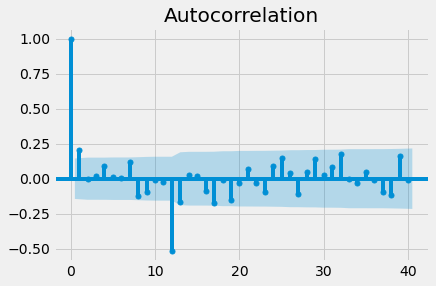

In [38]:
plot_acf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()


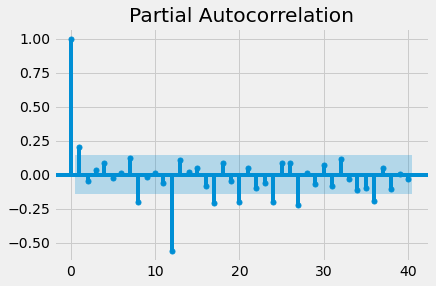

In [39]:
plot_pacf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

# Data Splitting

**I used temperature data from 2002-2015 to train the model and 2015-2017 for testing purpose**

In [40]:
train=monthly["dewpt"][:"2015-01-01"].to_frame()
test=monthly["dewpt"]["2015-01-01":].to_frame()

train.shape,test.shape

((168, 1), (28, 1))

# SARIMAX

**There are few other models for TimeSeries data but for this data I have used SARIMAX model**

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

**SARIMAX takes arguments order=(p,d,q) & seasonal_order=(P,D,Q,s), so for this reason I have initialized parameters to grid search over the best parameters for SARIMAX.**

In [42]:
p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

**This for loop will iterate over all combinations of initialized parameters, fit SARIMAX model with all combinations and parameters yeilding lowest AIC will be selected**

In [43]:
for pdq_params in pdq:
    for seasonal_params in seasonal_pdq:
        try:
            model=SARIMAX(train,
                          order=pdq_params,
                          seasonal_order=seasonal_params
                         )
            result=model.fit()
            print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params,
                                                   seasonal_params,
                                                   result.aic
                                                  ))
            
        except:
            continue

SARIMAX((0, 0, 0)x(0, 0, 0, 12)12)-AIC:1435.806215860622
SARIMAX((0, 0, 0)x(0, 0, 1, 12)12)-AIC:1259.6236694934878
SARIMAX((0, 0, 0)x(0, 1, 0, 12)12)-AIC:710.1238653862846
SARIMAX((0, 0, 0)x(0, 1, 1, 12)12)-AIC:655.8180609365088
SARIMAX((0, 0, 0)x(1, 0, 0, 12)12)-AIC:813.3679148614868
SARIMAX((0, 0, 0)x(1, 0, 1, 12)12)-AIC:759.8572123877991
SARIMAX((0, 0, 0)x(1, 1, 0, 12)12)-AIC:665.1647678963167
SARIMAX((0, 0, 0)x(1, 1, 1, 12)12)-AIC:655.8210007391078
SARIMAX((0, 0, 1)x(0, 0, 0, 12)12)-AIC:1247.4794271376488
SARIMAX((0, 0, 1)x(0, 0, 1, 12)12)-AIC:1116.5951340107167
SARIMAX((0, 0, 1)x(0, 1, 0, 12)12)-AIC:702.27516515004
SARIMAX((0, 0, 1)x(0, 1, 1, 12)12)-AIC:645.2471020720438
SARIMAX((0, 0, 1)x(1, 0, 0, 12)12)-AIC:799.2145676845926
SARIMAX((0, 0, 1)x(1, 0, 1, 12)12)-AIC:743.2618337078345
SARIMAX((0, 0, 1)x(1, 1, 0, 12)12)-AIC:656.719163126985
SARIMAX((0, 0, 1)x(1, 1, 1, 12)12)-AIC:645.7959895499278
SARIMAX((0, 1, 0)x(0, 0, 0, 12)12)-AIC:934.3717645454602
SARIMAX((0, 1, 0)x(0, 0, 1, 12)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX((0, 1, 1)x(1, 0, 1, 12)12)-AIC:717.304034115434
SARIMAX((0, 1, 1)x(1, 1, 0, 12)12)-AIC:664.4478589020641
SARIMAX((0, 1, 1)x(1, 1, 1, 12)12)-AIC:642.034069740231
SARIMAX((1, 0, 0)x(0, 0, 0, 12)12)-AIC:941.9378185478863
SARIMAX((1, 0, 0)x(0, 0, 1, 12)12)-AIC:883.2379749151116
SARIMAX((1, 0, 0)x(0, 1, 0, 12)12)-AIC:702.8493258926642
SARIMAX((1, 0, 0)x(0, 1, 1, 12)12)-AIC:643.6430309470709
SARIMAX((1, 0, 0)x(1, 0, 0, 12)12)-AIC:797.2624633490428
SARIMAX((1, 0, 0)x(1, 0, 1, 12)12)-AIC:737.482796531413
SARIMAX((1, 0, 0)x(1, 1, 0, 12)12)-AIC:656.1396171888367
SARIMAX((1, 0, 0)x(1, 1, 1, 12)12)-AIC:644.2283000260402
SARIMAX((1, 0, 1)x(0, 0, 0, 12)12)-AIC:913.8924351092178
SARIMAX((1, 0, 1)x(0, 0, 1, 12)12)-AIC:876.8425564377358
SARIMAX((1, 0, 1)x(0, 1, 0, 12)12)-AIC:704.274120072114
SARIMAX((1, 0, 1)x(0, 1, 1, 12)12)-AIC:642.0659020701798
SARIMAX((1, 0, 1)x(1, 0, 0, 12)12)-AIC:793.1000058845052
SARIMAX((1, 0, 1)x(1, 0, 1, 12)12)-AIC:726.9594104975758
SARIMAX((1, 0, 1)x(1, 1, 0, 12)12)-

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX((1, 1, 1)x(1, 0, 1, 12)12)-AIC:707.2749696690985
SARIMAX((1, 1, 1)x(1, 1, 0, 12)12)-AIC:657.0929908151045
SARIMAX((1, 1, 1)x(1, 1, 1, 12)12)-AIC:637.6487461386937


We have observed the model with **SARIMAX((1, 0, 0)x(0, 1, 1, 12)12)-AIC:522.8763887409265** is better than all other combinations hence we will use this combination as our parameters


In [44]:
model=SARIMAX(train,
              order=(1,0,0),
              seasonal_order=(0,1,1,12)
             ).fit()

**Model Summary**

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                dewpt   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -318.822
Date:                              Thu, 21 Apr 2022   AIC                            643.643
Time:                                      19:05:48   BIC                            652.793
Sample:                                  01-31-2001   HQIC                           647.359
                                       - 12-31-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3012      0.082      3.654      0.000       0.140       0.463
ma.S.L12      -0.6963      0.086     -8.110      0.000      -0.865      -0.528
sigma2         3.3132      0.375      8.842      0.000       2.579       4.048
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 6.30
Prob(Q):                              0.39   Prob(JB):                         0.04
Heteroskedasticity (H):               0.76   Skew:                            -0.31
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Residual plot: There is no obvious patterns observed.**

**Histogram + KDE plot: KDE curve is similar to the normal distribution**

**Normal Q-Q: Most of the data points lies on the red line**

**Correlogram :correlations for lag greater than one is not significant** 

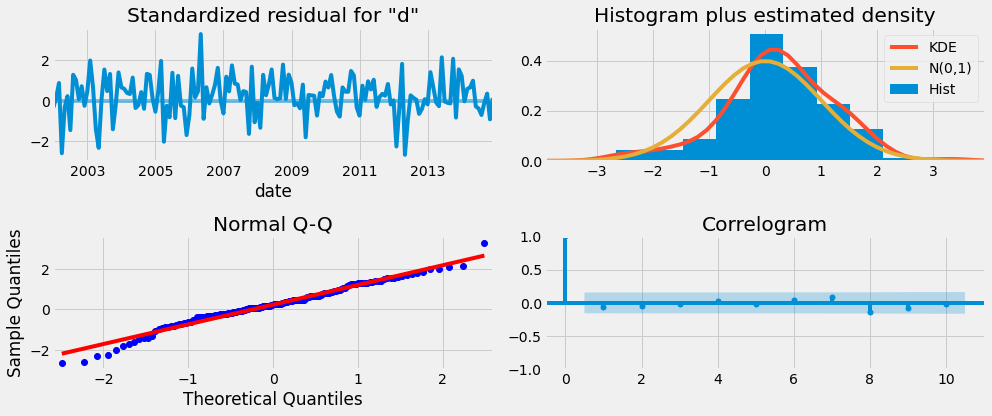

In [46]:
model.plot_diagnostics(figsize=(14,6))
plt.tight_layout()
plt.show()

**Predict the test data**

In [47]:
predict=model.get_prediction(start=len(train),
                             end=(len(train)+len(test)-1)
                            )

**get the upper and lower bounds of predicted values**

In [48]:
predict_values=predict.predicted_mean
bounds=predict.conf_int()
bounds.head()

,lower dewpt,upper dewpt
2015-01-31,5.372359,12.507621
2015-02-28,7.074891,14.526680
2015-03-31,10.247565,17.727398
2015-04-30,10.451599,17.933970
2015-05-31,13.388035,20.870636


In [49]:
lower_lim=bounds["lower dewpt"]
upper_lim=bounds["upper dewpt"]

**Our Prediction is working well as of now and giving us good results on Test data**

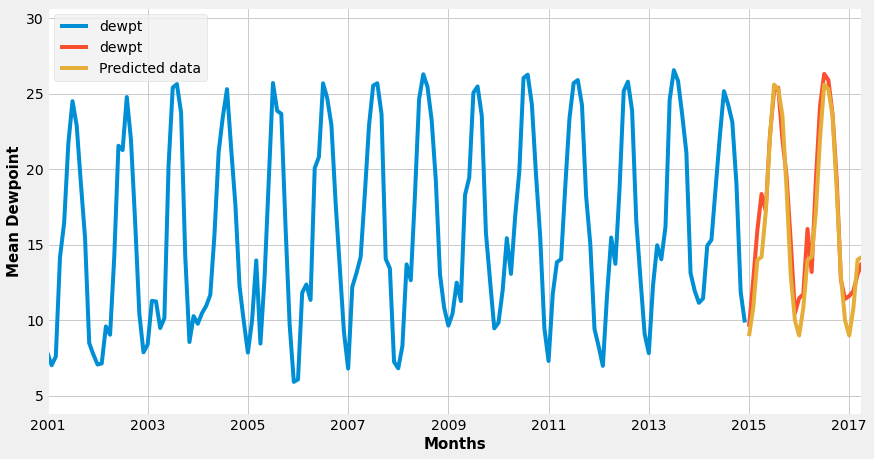

In [50]:
ax=train.plot(label="Training Data",figsize=(13,7))
test.plot(label="Testing Data",ax=ax)
predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(bounds.index,lower_lim,upper_lim,color="white",alpha=0.1)
ax.set_facecolor("white")
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

**RMSE is 1.55 which is pretty good**

In [51]:
rmse=mean_squared_error(test["dewpt"].values,predict_values,squared=False)
rmse

1.5554761873609593

In [52]:
test.tail()

,dewpt
date,
2016-12-31,11.406891
2017-01-31,11.600317
2017-02-28,11.934948
2017-03-31,13.024889
2017-04-30,13.803430


**Now lets try to predict new data from March 2017 to December 2021**

In [53]:
dates_to_predict=pd.date_range(start="2017-04-30",end="2023-12-31",freq="M")
len(dates_to_predict)

81

In [54]:
new_predict=model.get_prediction(start=len(monthly),
                                 end=(len(monthly)+len(dates_to_predict)-1)
                                )

In [55]:
new_predict_values=new_predict.predicted_mean

In [56]:
new_bounds=new_predict.conf_int()
new_lower_lim=new_bounds["lower dewpt"]
new_upper_lim=new_bounds["upper dewpt"]

**The new predicted Monthly average Temperature**

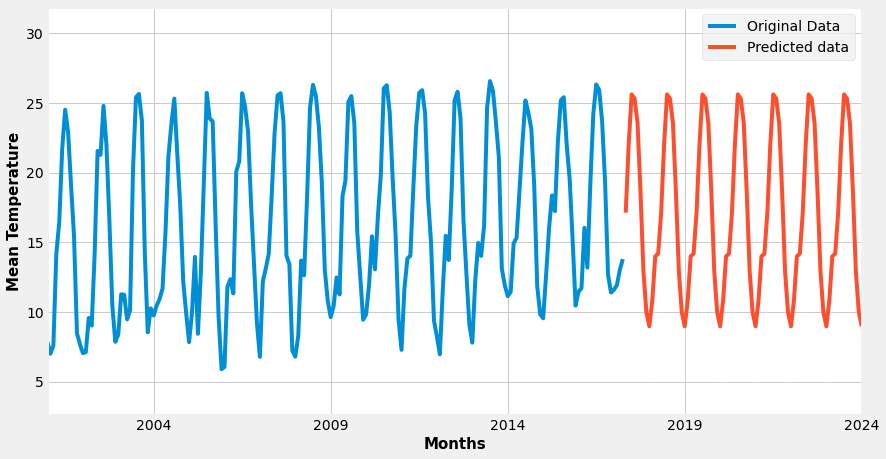

In [57]:
ax=monthly["dewpt"].plot(label="Original Data",figsize=(13,7))
new_predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(new_bounds.index,new_lower_lim,new_upper_lim,color="white",alpha=0.1)
ax.set_facecolor("white")
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

### Using CNN-LSTM as additional algorithms

In [75]:
import numpy as np 
import pandas as pd
import os

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [77]:
data = pd.read_csv("testset.csv")

In [78]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [79]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])

In [80]:
data['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [81]:
data[' _dewptm'].fillna(data[' _dewptm'].mean(), inplace=True)

In [82]:
data[' _dewptm'].isna().sum()

0

In [83]:
str(data['datetime_utc'][0])

'1996-11-01 11:00:00'

In [84]:
data = pd.DataFrame(list(data[' _dewptm']), index=data['datetime_utc'], columns=['dewpt'])

In [85]:
data

,dewpt
datetime_utc,
1996-11-01 11:00:00,9.0
1996-11-01 12:00:00,10.0
1996-11-01 13:00:00,11.0
1996-11-01 14:00:00,10.0
1996-11-01 16:00:00,11.0
...,...
2017-04-24 06:00:00,17.0
2017-04-24 09:00:00,14.0
2017-04-24 12:00:00,12.0


In [86]:
data = data.resample('D').mean()

In [87]:
data.dewpt.isna().sum()

141

In [88]:
data.fillna(data['dewpt'].mean(), inplace=True)

In [89]:
data.dewpt.isna().sum()

0

In [90]:
data

,dewpt
datetime_utc,
1996-11-01,11.666667
1996-11-02,10.458333
1996-11-03,12.041667
1996-11-04,10.222222
1996-11-05,8.200000
...,...
2017-04-20,16.750000
2017-04-21,21.500000
2017-04-22,20.400000


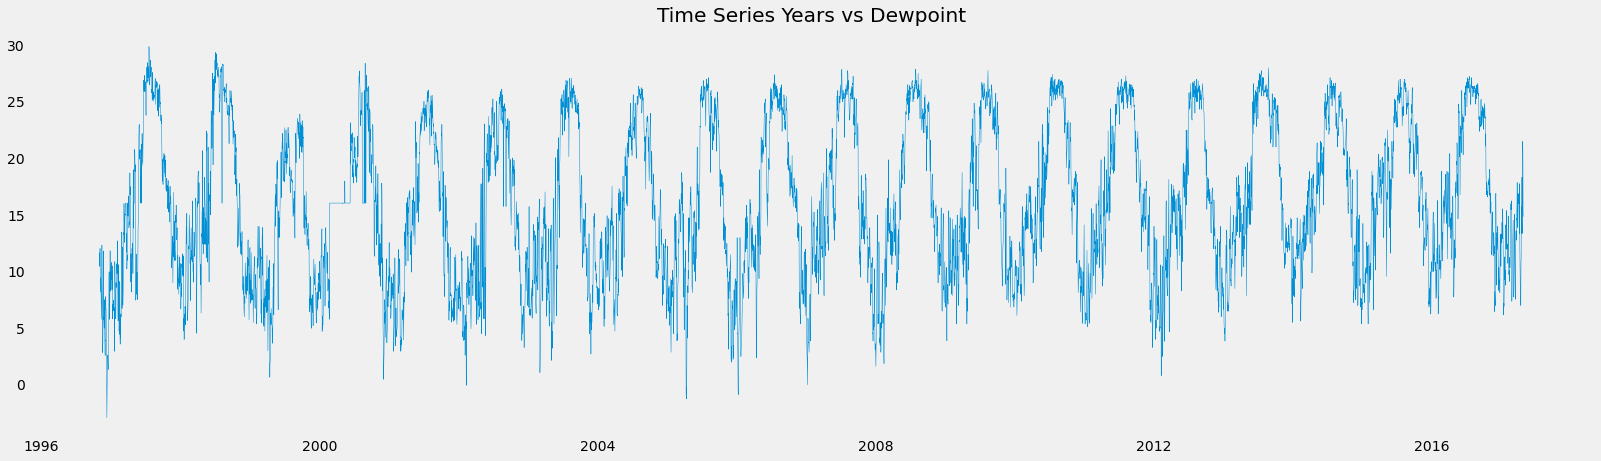

In [106]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series Years vs Dewpoint")
plt.show()


In [92]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [93]:
data_scaled

array([[-0.11057692],
       [-0.18431028],
       [-0.08769416],
       ...,
       [ 0.42233728],
       [ 0.10045303],
       [ 0.0841082 ]])

In [94]:
data_scaled.shape

(7480, 1)

In [95]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [96]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [97]:
x_train = inp[:7300,:,:]
x_test = inp[7300:,:,:]    
y_train = out[:7300]    
y_test= out[7300:]

In [98]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [99]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor="loss",patience=50)

In [100]:
history=model.fit(x_train,y_train,epochs=200,steps_per_epoch=3,verbose=False,callbacks=[callback])

In [101]:
predict = model.predict(x_test)

In [102]:
predict = scalar.inverse_transform(predict)

In [103]:
Ytesting = scalar.inverse_transform(y_test)

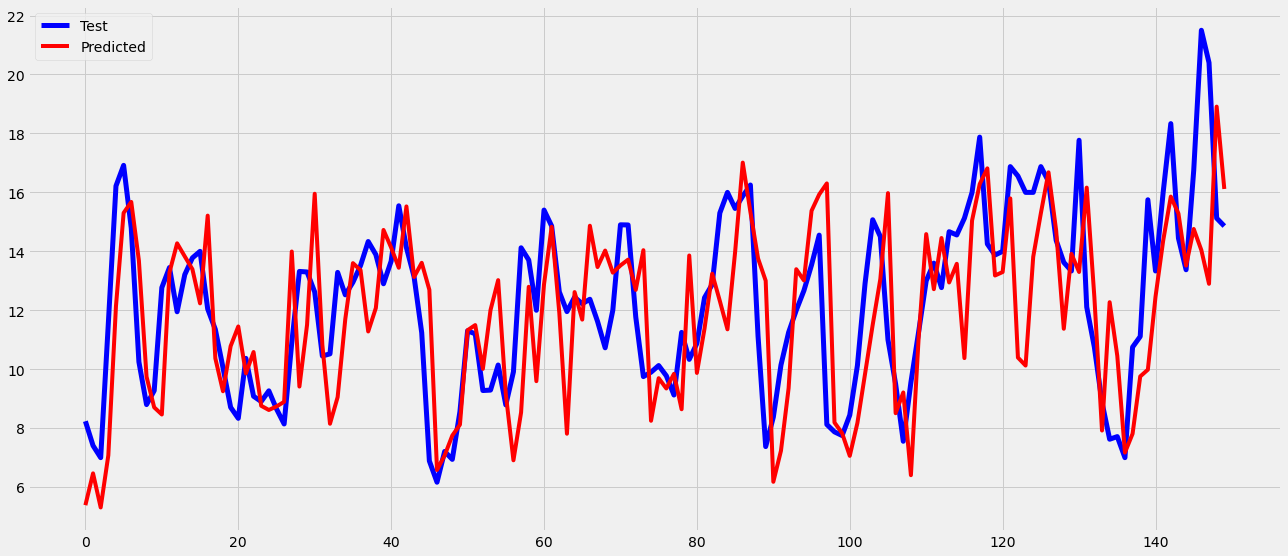

In [104]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()


In [105]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

6.826031223776205

In [ ]:
### Using Pyspark to handle the data

from pyspark.sql import SparkSession

spark=SparkSession.builder.appName('Marine Weather').getOrCreate()

spark

py_spark=spark.read.csv('testset.csv',header=True,inferSchema=True)

py_spark.select(['datetime_utc',' _dewptm',
 ' _fog',
 ' _hail',' _hum', ' _pressurem',
 ' _rain',
 ' _snow',
 ' _tempm',
 ' _thunder',
 ' _tornado', ' _wdird', ' _wspdm']).show()

py_spark=py_spark[["datetime_utc"," _dewptm"]]
py_spark.show()

**Necessary Libraries For Development**

import numpy as np 
import pandas as pd 
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
import os

**Read the data**

data=pd.read_csv("testset.csv")
data.head()

data.columns

# Exploratory Data Analysis

data.shape

**I have extracted datetime and temperature from the data**

data=data[["datetime_utc"," _dewptm"]]
data.head()

data.columns=["date","dewpt"]
data.columns

data.dtypes

**Converting date columns into pandas datetime format**

data["date"]=pd.to_datetime(data["date"],format="%Y%m%d-%H:%M")
data.dtypes

**Making date column as an index of the dataframe**

data=data.set_index("date")

data.tail()

**Visualize the data**

fig=plt.figure(figsize=(13,7),facecolor="white")
ax = plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize="15",fontweight="bold")
plt.grid(False)
plt.plot(data)
plt.show()


**Counting null values: There are 2358 null values in our data but as of now we will not handle the missing data, I have handled in later part of Notebook**

null=data[data.isnull().any(axis=1)]
print("Null values:",null.shape[0])

**Obtain the average temperature of days in a month(daily_mean),monthly mean(monthly_mean) in a year and hourly mean in a day.**

daily_mean=data.groupby(data.index.day).mean()
monthly_mean=data.groupby(data.index.month).mean()
hourly_mean=data.groupby(data.index.hour).mean()
yearly_mean=data.groupby(data.index.year).mean()


**The plot below makes sense to us, the temperature rises during daytime and drops towards evening and morning.**

fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=16,fontweight="bold")
plt.show()


**The monthly_mean plot depicts that the avg temperature is highest during the summer season(March-July) and drops significantly in winter seasons.**

fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(1,13))
plt.xlabel("Months in a year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.show()

**There is no noticeable patterns in the days in month, because temperature varies in different days in different months.**

fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(daily_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.show()

fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.show()

# Analysis of Daily Data

**We will now resample our hourly data into daily data using the resampling method**

daily=data.resample("D").mean()
print("Sample reduced by {} rows after resampling".format(data.shape[0]-daily.shape[0]))

**As we plot our daily data we now observe that in between 2000-2001 there are huge amount of missing data, so we will take the dataset from 2001 and drop the data of preceding days.**

fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(False)
plt.plot(daily)
plt.show()

**Droping daily data before 2001-01-01**

daily=daily["2001-01-01":]
daily.shape

**Now my data contains observations from 2001-01-01 as seen in the plot below**

fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(False)
plt.plot(daily)
plt.show()


**Despite removing huge chunk of missing data, I re-encountered 4 missing data, since now the amount of missing data is very small compared to the total datasize, I have filled the daily missing data using the temperatures of preceding days.**

print("Null values before:",daily.isnull().sum())

daily=daily.fillna(method="ffill")

print("Null values After:",daily.isnull().sum())

# MA(Moving Average to predict daily temperature):

**Since there is minute difference in the temperature between consecutive days, I assumed that present days temperature will be equivalent to the average temperature of its preceding day.**

**So I have used current temperature as the temperature of its past one day and for that reason I have made a predicted temperature by shifting the dataframe by one row.**

actual=daily["dewpt"].to_frame().rename(columns={"dewpt":"actual"})
predicted=daily["dewpt"].to_frame().shift(1).rename(columns={"dewpt":"predicted"})

df_daily=pd.concat([actual,predicted],axis=1)

df_daily.head()

**There is one nan row because of shifting so I have deleted that**

df_daily=df_daily[1:]

**The blue line shows actual data and orange as predicted temperature, we can see that the plot is so identical and the forecasting is so precise**

fig=plt.figure(figsize=(13,8),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(df_daily["actual"],label="Actual",color="black")
plt.plot(df_daily["predicted"],label="Predicted")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(False)
plt.legend(loc="best")
plt.show()

**RMSE values accounts to 1.6 which is pretty good.**

rmse=mean_squared_error(df_daily["actual"],df_daily["predicted"],squared=False)
print("RMSE: {:.1f}".format(rmse))

# Disadvantage of MA:

* **Since I am just taking the temperature of past as the temperature of future, in a long run my model will just be predicting same recorded temperatures, this is so Naive of MA model.**
* **We know that for past decades we are experiencing a rise in temperature(global warming), and it will increase in the future, so for that reason we also have to take into account of exogenous features/variables, which MA neglects.**


# Analysis of Monthly Data

**I have resampled my daily data into monthly data**

**As we can see the plot becomes more smoother than the daily data**

monthly=daily.resample("M").mean()
fig=plt.figure(figsize=(13,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("white")
plt.plot(monthly)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(True)
plt.show()

**Components of Time Series Data:**

**1. Trend: A gradual increase or decrease increase in the of observations(mean & variance) over a long period of time.**

**2. Seasonality: Repeating/predictable pattern over a certain time period.**

**3. Residual: It is also called as the white noise, which generally are the errors which does not account to trend and seasonality.**

**I have decomposed monthly data and it shows clear seasonality in every 12 months and from 2002-2008 the monthly temperature decreases, however increases later.**

from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(monthly)
result.plot()
plt.show()

monthly.head()

# Stationarity test:

**Non-Stationarity data: Since we have observed that our data exhibits seasonality and trend & it will effect value of time series at different time. So to feed our time series data to Models we have to convert them into stationary data**

**Stationairty data: Data whose properties does not depend on time. The mean and variance remain constant with change in time, and hence the data dependence on time will be eliminated can perform statistical analysis on stationary data.**

# Ways to check stationarity:
**1. Visualization: We have concluded form the above visualization plots that the data exhibits seasonality.**

**2. Adfuller test: We can confirm data stationarity using adfuller statistics which I have discussed below**

from statsmodels.tsa.stattools import adfuller

**The function will return the adfuller statistics**


def check_adfuller(data):
    result=adfuller(data)
    
    print("ADF statistics:{}".format(result[0]))
    print("p-value:{}".format(result[1]))
    print("lags used:{}".format(result[2]))
    print("No of observation:{}".format(result[3]))
    print()
    print("Critical Values:")
    for key,value in result[4].items():
        print("Critical({}):{}".format(key,value))    

**Ideally we consider that time series data as stationary if p-value<0.05 & ADF statstics lesser than critical values, however in this case we have p=0.55 and ADF statistics greater than critical values, hence we conclude that our monthly data is not stationary.** 

check_adfuller(monthly)

# How to make data stationary?
**Differencing**: It is a method of transforming a time series dataset. It can be used to remove the series dependence on time, so-called temporal dependence. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.


**For this reason I have used differencing with an order of 12(Seasonal order) as we have observed that data has a repeating pattern after 12 months period.**

monthly["Seasonal Diff"]=monthly["dewpt"]-monthly["dewpt"].shift(12)

**Now our p-value is less than 0.05 and ADF statistics smaller than critical values, now we have obtained a stationary data.**

check_adfuller(monthly["Seasonal Diff"].dropna())

**Comparing the Differenced series with an original series it have remove trend and sesonality form our data**

monthly["Seasonal Diff"].plot()
plt.show()

**Lets plot auto-correlation and partial auto-correlation for the differenced series**

**Auto-Correlation plot will help find MA order and partial-autocorrelation for AR order i.e the order of p,q for time series model**

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

**Both acf & pacf plot shows significant bar after every 12 lags, but it is very difficult to get the orders of MA and AR orders from the plots so I have used gridSearch to search over various combinations that yeilds the smallest AIC.**

plot_acf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()


plot_pacf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

# Data Splitting

**I used temperature data from 2002-2015 to train the model and 2015-2017 for testing purpose**

train=monthly["dewpt"][:"2015-01-01"].to_frame()
test=monthly["dewpt"]["2015-01-01":].to_frame()

train.shape,test.shape

# SARIMAX

**There are few other models for TimeSeries data but for this data I have used SARIMAX model**

from statsmodels.tsa.statespace.sarimax import SARIMAX

**SARIMAX takes arguments order=(p,d,q) & seasonal_order=(P,D,Q,s), so for this reason I have initialized parameters to grid search over the best parameters for SARIMAX.**

p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

**This for loop will iterate over all combinations of initialized parameters, fit SARIMAX model with all combinations and parameters yeilding lowest AIC will be selected**

for pdq_params in pdq:
    for seasonal_params in seasonal_pdq:
        try:
            model=SARIMAX(train,
                          order=pdq_params,
                          seasonal_order=seasonal_params
                         )
            result=model.fit()
            print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params,
                                                   seasonal_params,
                                                   result.aic
                                                  ))
            
        except:
            continue

We have observed the model with **SARIMAX((1, 0, 0)x(0, 1, 1, 12)12)-AIC:522.8763887409265** is better than all other combinations hence we will use this combination as our parameters


model=SARIMAX(train,
              order=(1,0,0),
              seasonal_order=(0,1,1,12)
             ).fit()

**Model Summary**

model.summary()

**Residual plot: There is no obvious patterns observed.**

**Histogram + KDE plot: KDE curve is similar to the normal distribution**

**Normal Q-Q: Most of the data points lies on the red line**

**Correlogram :correlations for lag greater than one is not significant** 

model.plot_diagnostics(figsize=(14,6))
plt.tight_layout()
plt.show()

**Predict the test data**

predict=model.get_prediction(start=len(train),
                             end=(len(train)+len(test)-1)
                            )

**get the upper and lower bounds of predicted values**

predict_values=predict.predicted_mean
bounds=predict.conf_int()
bounds.head()

lower_lim=bounds["lower dewpt"]
upper_lim=bounds["upper dewpt"]

**Our Prediction is working well as of now and giving us good results on Test data**

ax=train.plot(label="Training Data",figsize=(13,7))
test.plot(label="Testing Data",ax=ax)
predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(bounds.index,lower_lim,upper_lim,color="white",alpha=0.1)
ax.set_facecolor("white")
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Dewpoint",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

**RMSE is 1.55 which is pretty good**

rmse=mean_squared_error(test["dewpt"].values,predict_values,squared=False)
rmse

test.tail()

**Now lets try to predict new data from March 2017 to December 2021**

dates_to_predict=pd.date_range(start="2017-04-30",end="2023-12-31",freq="M")
len(dates_to_predict)

new_predict=model.get_prediction(start=len(monthly),
                                 end=(len(monthly)+len(dates_to_predict)-1)
                                )

new_predict_values=new_predict.predicted_mean

new_bounds=new_predict.conf_int()
new_lower_lim=new_bounds["lower dewpt"]
new_upper_lim=new_bounds["upper dewpt"]

**The new predicted Monthly average Temperature**

ax=monthly["dewpt"].plot(label="Original Data",figsize=(13,7))
new_predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(new_bounds.index,new_lower_lim,new_upper_lim,color="white",alpha=0.1)
ax.set_facecolor("white")
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

### Using CNN-LSTM as additional algorithms

import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

data = pd.read_csv("testset.csv")

data.head()

data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])

data['datetime_utc']

data[' _dewptm'].fillna(data[' _dewptm'].mean(), inplace=True)

data[' _dewptm'].isna().sum()

str(data['datetime_utc'][0])

data = pd.DataFrame(list(data[' _dewptm']), index=data['datetime_utc'], columns=['dewpt'])

data

data = data.resample('D').mean()

data.dewpt.isna().sum()

data.fillna(data['dewpt'].mean(), inplace=True)

data.dewpt.isna().sum()

data

plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series Years vs Dewpoint")
plt.show()


from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

data_scaled

data_scaled.shape

steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

inp=np.asanyarray(inp)
out=np.asanyarray(out)

x_train = inp[:7300,:,:]
x_test = inp[7300:,:,:]    
y_train = out[:7300]    
y_test= out[7300:]

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor="loss",patience=50)

history=model.fit(x_train,y_train,epochs=200,steps_per_epoch=3,verbose=False,callbacks=[callback])

predict = model.predict(x_test)

predict = scalar.inverse_transform(predict)

Ytesting = scalar.inverse_transform(y_test)

plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()


from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)



